# **Load and Preprocess the Data**

In [1]:
# import library
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Load the dataset
df=pd.read_csv("twitter_training.csv",header=None)
df.columns = ['id', 'game', 'sentiment', 'text']

In [3]:
df.head()

,id,game,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df['text'] = df['text'].astype(str)

In [5]:
# Preprocess the text
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    filtered_words = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]  # Remove stopwords and lemmatize
    return " ".join(filtered_words)

In [7]:
# Adding a new column 'cleaned_text' after preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)


In [8]:
df.columns

Index(['id', 'game', 'sentiment', 'text', 'cleaned_text'], dtype='object')

# **Sentiment Analysis**

In [9]:

from textblob import TextBlob

# Function to get sentiment score
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment)

# Label the sentiments
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the sentiment
print(df[['cleaned_text', 'sentiment_score', 'sentiment']].head())


                   cleaned_text  sentiment_score sentiment
0  im getting borderland murder              0.0   neutral
1            coming border kill              0.0   neutral
2    im getting borderland kill              0.0   neutral
3   im coming borderland murder              0.0   neutral
4  im getting borderland murder              0.0   neutral


# **Data visualisation**

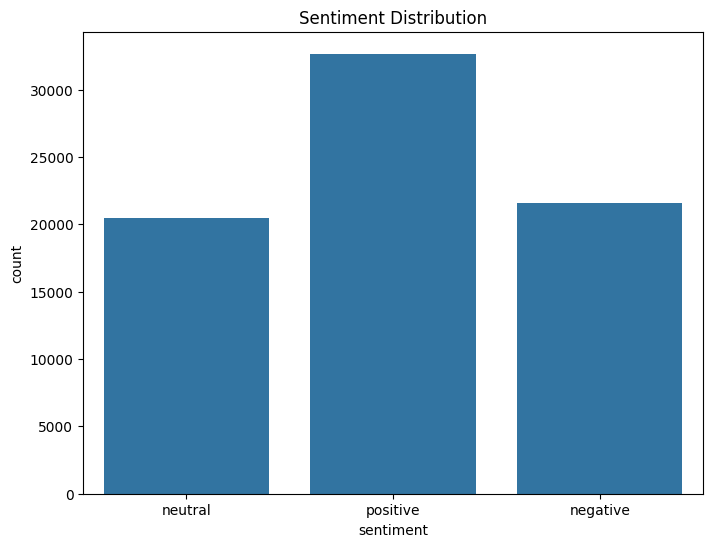

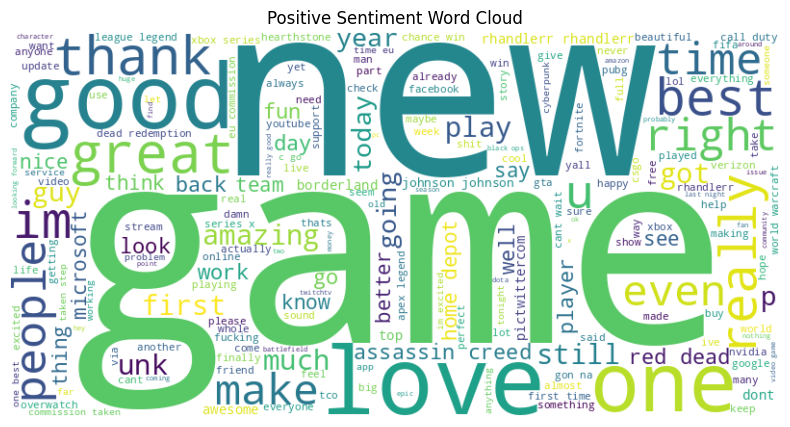

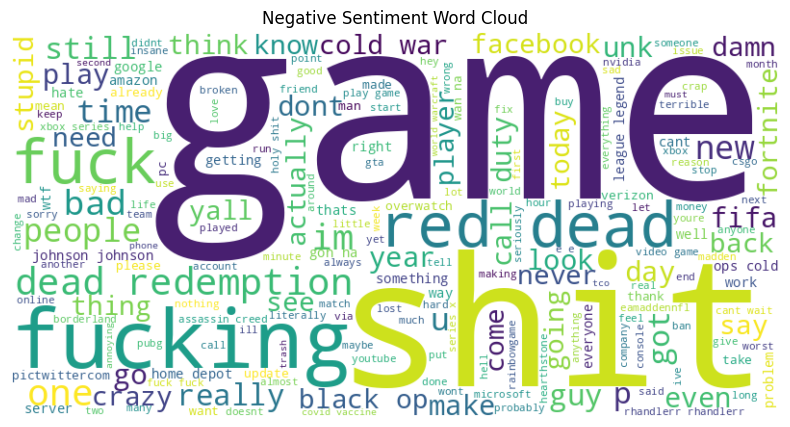

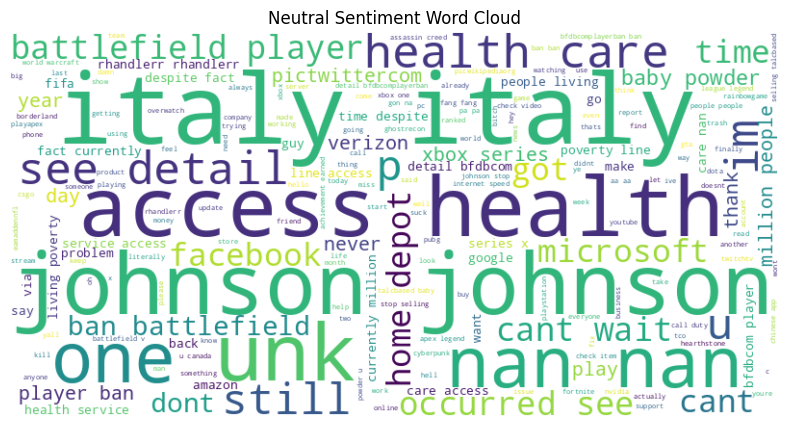

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sentiment distribution
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Word Clouds for each sentiment
for sentiment in ['positive', 'negative', 'neutral']:
    words = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment.capitalize()} Sentiment Word Cloud')
    plt.axis('off')
    plt.show()
